In [1]:
import quanguru as qg
import numpy as np
import matplotlib.pyplot as plt

# 7 - Simulation of a Qubit with two terms Hamiltonian

In previous tutorials, we covered how to set an initial state to a quantum system and how to describe its Hamiltonian.

Here, we will evolve the quantum system under the unitary dynamics of its Hamiltonian.
First, we create a quantum system and describe its Hamiltonian $H=f_{z}J_{z} + f_{x}\sigma_{x}$ and, for the sake of the example, we won't use the special `Qubit` class.

In [2]:
qub = qg.QuantumSystem(operator=qg.Jz)
qub.dimension = 2
qub.frequency = 1
# add a second term with frequency 1 and operator sigmax
secondTerm = qub.createTerm(operator=qg.sigmax)
secondTerm.frequency = 1

Now, let's set its initial state to $|1\rangle$.

In [3]:
qub.initialState = 1

Finally, let's set the total simulation time (with `simTotalTime`) and the step size (`simStepSize`), which is basically the sampling rate of the dynamics.

In [4]:
qub.simTotalTime = 2*np.pi
qub.simStepSize = 0.1

At this point, all the essential information are set, and we can run the simulation by `qub.runSimulation()`, which returns the list of states for the time evolution of our `QuantumSystem`

In [5]:
states = qub.runSimulation()

Given the time trace of states, we can calculate any quantity that we want, and, below, we calculate the expectation values of $\sigma_{x}$ and $\sigma_{z}$ operators.

In [6]:
sigmaX = qg.sigmax()
sigmaZ = qg.sigmaz()
expectations = [[], []]
for st in states:
    expectations[0].append(qg.expectation(sigmaX, st))
    expectations[1].append(qg.expectation(sigmaZ, st))

Finally, let's plot the expectation values as a function of time.

Text(0.5, 0, 'Time')

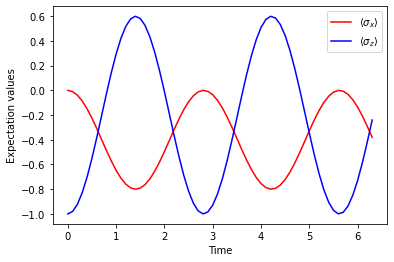

In [7]:
plt.plot(qub.simulation.timeList, expectations[0], 'r-', label=r"$\langle \sigma_{x} \rangle$")
plt.plot(qub.simulation.timeList, expectations[1], 'b-', label=r"$\langle \sigma_{z} \rangle$")

plt.legend()
plt.ylabel("Expectation values")
plt.xlabel("Time")